In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
cancer = load_breast_cancer()

In [3]:
X = cancer.data
y = cancer.target

### 0 악성, 1 양성

In [4]:
cancer.target_names #악성, 양성

array(['malignant', 'benign'], dtype='<U9')

In [5]:
model = LogisticRegression(C=0.001)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 7)

In [6]:
model.fit(X_train,y_train)

C:\Users\anihy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
pre = model.predict(X_test)
pre

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [10]:
np.bincount(pre)

array([ 36, 107], dtype=int64)

In [11]:
np.bincount(y_test)

array([45, 98], dtype=int64)

### confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix,classification_report

### 0,0 진짜 악성, 예측 악성
### 0,1 진짜 악성, 예측 양성
### 1,0 진짜 양성, 예측 악성
### 1,1 진짜 양성, 예측 양성

In [13]:
confusion_matrix(y_test,model.predict(X_test))

array([[35, 10],
       [ 1, 97]], dtype=int64)

### 0(악성 종양)을 양성으로 볼 경우 윗 줄,  1(양성 종양)을 양성으로 볼 경우 아랫 줄

In [15]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86        45
           1       0.91      0.99      0.95        98

   micro avg       0.92      0.92      0.92       143
   macro avg       0.94      0.88      0.91       143
weighted avg       0.93      0.92      0.92       143



### ROC 곡선 그리기

In [15]:
from sklearn.metrics import roc_curve
fpr,tpr,th = roc_curve(y_test,model.decision_function(X_test))

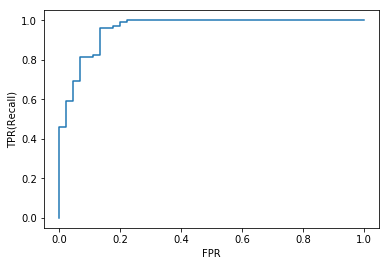

In [17]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR(Recall)")
plt.show()

### C값 조정

In [19]:
from sklearn.model_selection import cross_val_score

In [24]:
C_list = [0.0001,0.001,0.01,0.1,1,10,100,1000]
for C in C_list:
    model2 = LogisticRegression(C=C, solver="lbfgs", max_iter=1000000)
    result = cross_val_score(model2, X_train, y_train, cv=5)
    print("c : {}\t score : {}".format(C,result.mean()))

c : 0.0001	 score : 0.9273018044427073
c : 0.001	 score : 0.9391225327340237
c : 0.01	 score : 0.9531861116539639
c : 0.1	 score : 0.9531587518728422
c : 1	 score : 0.9531581004494821
c : 10	 score : 0.9624877858119992
c : 100	 score : 0.960078822226565
c : 1000	 score : 0.960078822226565


In [27]:
model2 = LogisticRegression(C=10,solver="lbfgs", max_iter=1000000)
model2.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
print(metrics.classification_report(y_test,model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        45
           1       0.94      0.99      0.97        98

   micro avg       0.95      0.95      0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



### ROC 곡선 비교

In [29]:
fpr2,tpr2,th2 = roc_curve(y_test,model2.decision_function(X_test))

In [30]:
print(th2)

[ 17.79508905  16.79508905   3.73740054   3.64906038   1.8874619
   1.56299355   1.26945041   1.10796698   0.82680573  -0.09659226
  -1.66387186 -36.40333431]


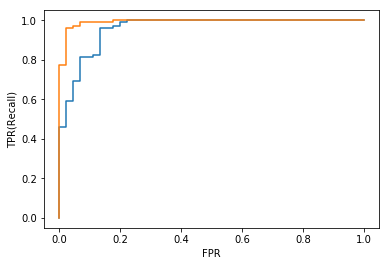

In [31]:
plt.plot(fpr,tpr)
plt.plot(fpr2,tpr2)
plt.xlabel("FPR")
plt.ylabel("TPR(Recall)")
plt.show()

### scoring을 이용한 ROC 교차검증
### scoring은 성능검증에 사용할 함수이름

In [43]:
"""RMSE로 평가"""
C_list = [0.0001,0.001,0.01,0.1,1,10,100,1000]
for C in C_list:
    model2 = LogisticRegression(C=C, solver="lbfgs", max_iter=1000000)
    result = cross_val_score(model2, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    print("c : {}\t score : {}".format(C,np.sqrt(-result.mean())))

c : 0.0001	 score : 0.2696260290797101
c : 0.001	 score : 0.2467335957383513
c : 0.01	 score : 0.21636517359786922
c : 0.1	 score : 0.21642839029840297
c : 1	 score : 0.21642989523288572
c : 10	 score : 0.19368070164061463
c : 100	 score : 0.19980284726058073
c : 1000	 score : 0.19980284726058073


In [34]:
"""AUC로 평가"""
C_list = [0.0001,0.001,0.01,0.1,1,10,100,1000]
for C in C_list:
    model2 = LogisticRegression(C=C, solver="lbfgs", max_iter=1000000)
    result = cross_val_score(model2, X_train, y_train, cv=5, scoring="roc_auc")
    print("c : {}\t score : {}".format(C,result.mean()))

c : 0.0001	 score : 0.9809474838886605
c : 0.001	 score : 0.9870298002650945
c : 0.01	 score : 0.9902223593400065
c : 0.1	 score : 0.9907993966817497
c : 1	 score : 0.9910279263220438
c : 10	 score : 0.9913581516522694
c : 100	 score : 0.9910622057680882
c : 1000	 score : 0.9908005393299512


### ROC 곡선 비교(위에랑 똑같음)

In [38]:
model3 = LogisticRegression(C=10, solver="lbfgs", max_iter=1000000)
model3.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
fpr3,tpr3,th3 = roc_curve(y_test,model3.decision_function(X_test))

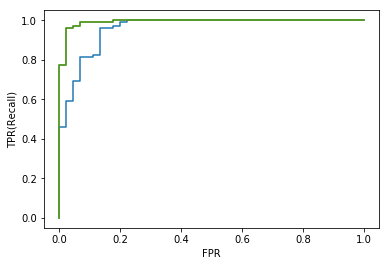

In [40]:
plt.plot(fpr,tpr)
plt.plot(fpr2,tpr2)
plt.plot(fpr3,tpr3)
plt.xlabel("FPR")
plt.ylabel("TPR(Recall)")
plt.show()